<a href="https://colab.research.google.com/github/JoaoDaross/Python_Investimentos/blob/master/investimentos_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando bibliotecas

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=75ec070429bf08c209ca6d2f4c0644074b5d2b4be6103cb6b5cfd1a6da1f0c00
  Stored in directory: /tmp/pip-ephem-wheel-cache-dxonjzvh/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Obtendo e tratando os dados

In [4]:
tickers = ["^BVSP" ,  "USDBRL=X"]
carteira = yf.download(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [5]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
...,...,...
2020-09-23,5.4699,95735.000000
2020-09-24,5.5924,97012.000000
2020-09-25,5.5084,96999.000000


In [6]:
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
2007-01-08,2.1465,42830.000000
...,...,...
2020-09-23,5.4699,95735.000000
2020-09-24,5.5924,97012.000000
2020-09-25,5.5084,96999.000000


In [7]:
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
2007-01-08,2.1465,42830.000000
...,...,...
2020-09-23,5.4699,95735.000000
2020-09-24,5.5924,97012.000000
2020-09-25,5.5084,96999.000000


## 3. Resultados

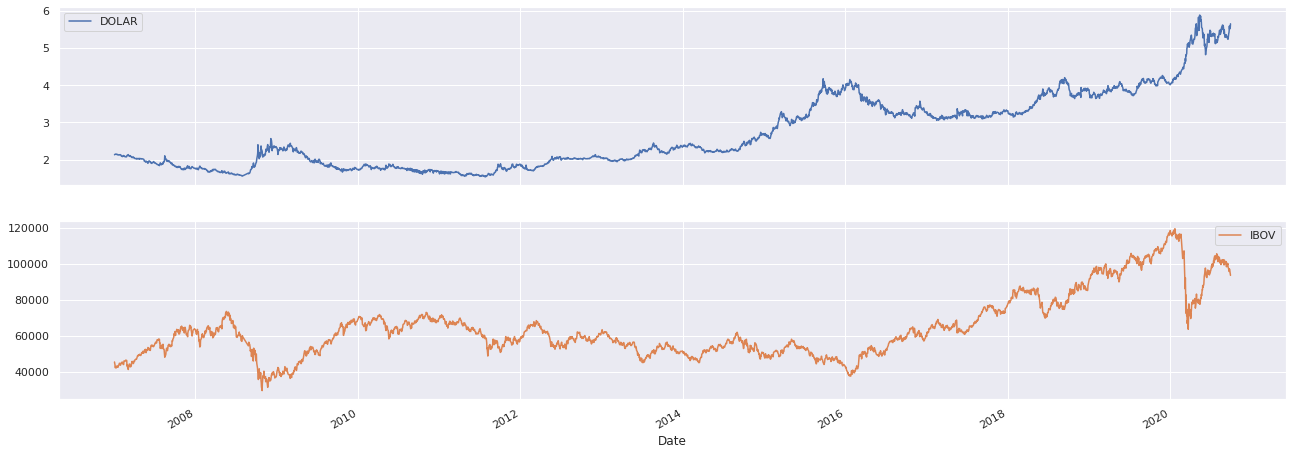

In [8]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

In [9]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2007-01-03,0.001642,-0.020669
2007-01-04,0.002108,-0.009562
2007-01-05,0.003740,-0.040323
2007-01-08,-0.000233,0.013848
2007-01-09,0.001165,-0.019216
...,...,...
2020-09-23,0.010586,-0.016024
2020-09-24,0.022395,0.013339
2020-09-25,-0.015020,-0.000134


In [10]:
retornos.describe()

,DOLAR,IBOV
count,3363.000000,3363.000000
mean,0.000366,0.000382
std,0.012297,0.018250
min,-0.104792,-0.147797
25%,-0.005881,-0.008602
50%,0.000096,0.000608
75%,0.006410,0.009638
max,0.101524,0.146560


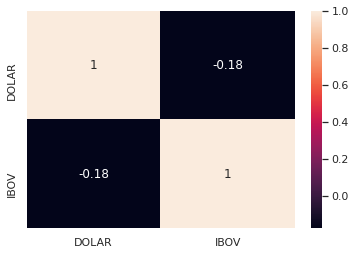

In [11]:
sns.heatmap(retornos.corr(), annot=True);

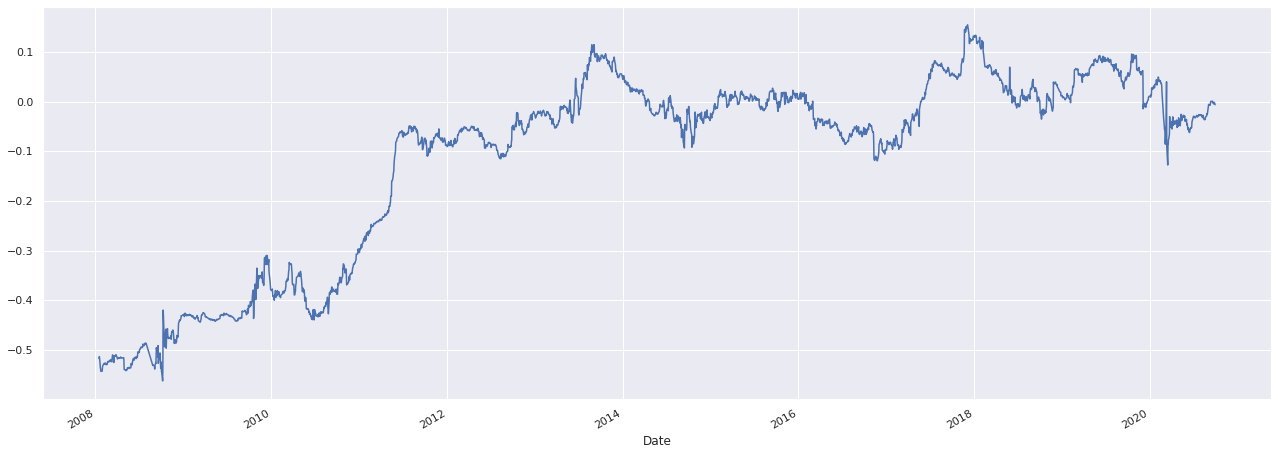

In [12]:
retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8));

In [13]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.1310,45383.000000,21296.573959
2007-01-03,2.1345,44445.000000,20822.206345
2007-01-04,2.1390,44020.000000,20579.710732
2007-01-05,2.1470,42245.000000,19676.291819
2007-01-08,2.1465,42830.000000,19953.411504
...,...,...,...
2020-09-23,5.4699,95735.000000,17502.147700
2020-09-24,5.5924,97012.000000,17347.113711
2020-09-25,5.5084,96999.000000,17609.287751


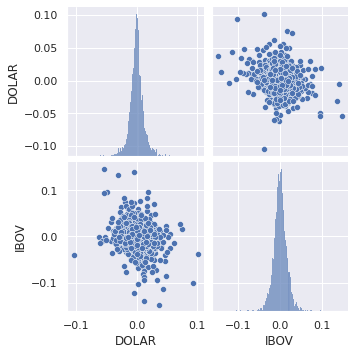

In [14]:
sns.pairplot(retornos);

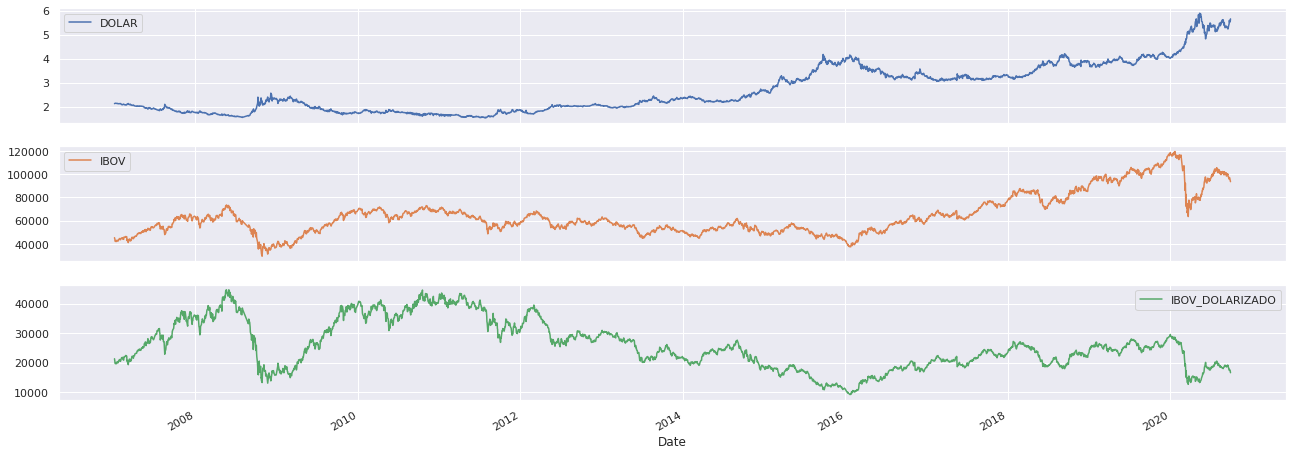

In [15]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));